<a href="https://colab.research.google.com/github/NWemphy/MachineLearningB_/blob/main/DBSCAN_OPTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
file_path = "/content/Pengunjung_mall.csv"
df = pd.read_csv(file_path)

In [7]:
features = ["Usia", "Pendapatan (juta Rp)", "Rating_pengeluaran (1-100)"]
X = df[features]
df

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40
...,...,...,...,...,...
195,196,Perempuan,35,120,79
196,197,Perempuan,45,126,28
197,198,Laki,32,126,74
198,199,Laki,32,137,18


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import DBSCAN, OPTICS

In [11]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [12]:
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
optics_labels = optics.fit_predict(X_scaled)

In [13]:
df["Cluster_DBSCAN"] = dbscan_labels
df["Cluster_OPTICS"] = optics_labels

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 1], data[:, 2], c=labels, cmap="viridis", edgecolors="k", alpha=0.7)
    plt.xlabel("Pendapatan (juta Rp)")
    plt.ylabel("Rating Pengeluaran (1-100)")
    plt.title(title)
    plt.colorbar(scatter, label="Cluster")
    plt.show()

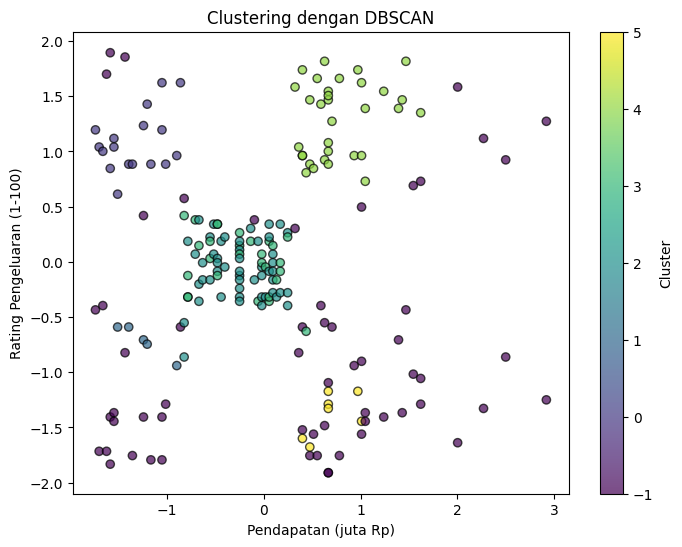

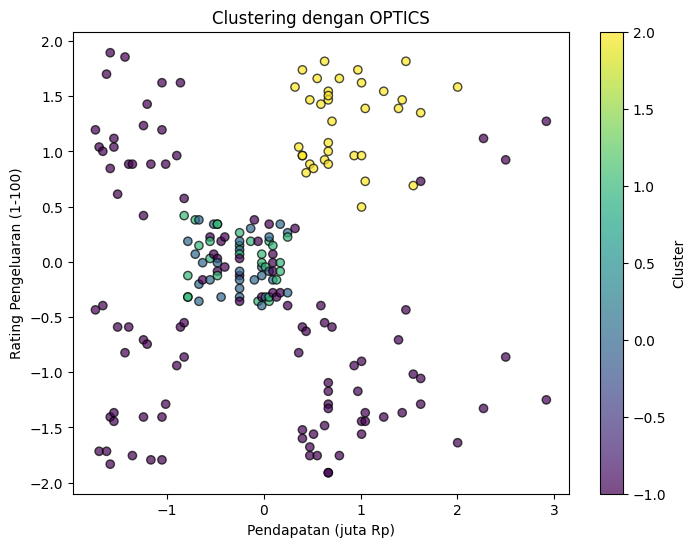

In [16]:
plot_clusters(X_scaled, dbscan_labels, "Clustering dengan DBSCAN")
plot_clusters(X_scaled, optics_labels, "Clustering dengan OPTICS")

In [17]:
print(df[["Usia", "Pendapatan (juta Rp)", "Rating_pengeluaran (1-100)", "Cluster_DBSCAN", "Cluster_OPTICS"]].head())

   Usia  Pendapatan (juta Rp)  Rating_pengeluaran (1-100)  Cluster_DBSCAN  \
0    19                    15                          39              -1   
1    21                    15                          81               0   
2    20                    16                           6              -1   
3    23                    16                          77               0   
4    31                    17                          40              -1   

   Cluster_OPTICS  
0              -1  
1              -1  
2              -1  
3              -1  
4              -1  
